In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print(os.getcwd())


/home/sharrq1/myjupyter


<h4>OUTLINE:</h4>
<font color='teal'>
<ul>
    <li>Distribution of the variables</li>
    <li>Relationship with the sales price</li>
    <li>Relationship with each other</li>
    <li>Scatter plot with each other</li>
    <li>Does it have any missing values</li>
    <li>How many of them are categorical variables</li>
    <li>If it is categorical, what to do</li>
    <li>How to convert into dummy variables</li>
</ul>
</font>

In [2]:
#Init dataframe
df_train = pd.read_csv('train.csv')

In [3]:
#List columns of dataframe
#Interested in first 16 variables (and sale price), excluding ID which is just a unique identifier
columns = []
list_columns = df_train.columns
for i in range(1,len(list_columns)):
    if i<=16:
        columns.append(list_columns[i])
columns.append('SalePrice') #Exception
print(columns)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'SalePrice']


In [4]:
#Create the dataframe with the handpicked columns
df_specific = df_train[columns]
df_specific.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,250000


In [5]:
#Array to store the variables of different categories

c_vars = [] #categorical variables
q_vars = [] #quantitative variables

c_vars.append('MSSubClass') #EXCEPTION

for i in df_specific:
    for value in df_specific[i]:
        if type(value)==str and (i not in c_vars):
            c_vars.append(i)
        elif type(value)!=str and (i not in q_vars) and i!='MSSubClass':
            q_vars.append(i)
print("Categorical:",c_vars,"\n")
print("Quantitative:",q_vars,"\n")
print("There are",len(c_vars),"categorical variables")

#c_vars contains a list of all the categorical variables, q_vars contains the latter (quantitative)


Categorical: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle'] 

Quantitative: ['LotFrontage', 'LotArea', 'Alley', 'SalePrice'] 

There are 14 categorical variables


<h2>Why 'MSSubClass' is a categorical variable (exception)</h2>
<p align='justify'>At first it may appear that <b>MSSubClass</b> is a quantitative variable as it appears to have integers as data values instead of string descriptions, however the integers represent the following data:</p>
<ul>
    <li>20	1-STORY 1946 & NEWER ALL STYLES</li>
    <li>30	1-STORY 1945 & OLDER</li>
    <li>40	1-STORY W/FINISHED ATTIC ALL AGES</li>
    <li>45	1-1/2 STORY - UNFINISHED ALL AGES</li>
    <li>50	1-1/2 STORY FINISHED ALL AGES</li>
</ul>
<p align='justify'><b>...</b> and so on (full details in data_description.txt)</p>

In [6]:
#Dealing with missing values
num_missing = 0
num_present = 0
for i in df_specific:
    missing_vals= pd.isna(df_specific[i])
    for value in missing_vals:
        if value==True:
            num_missing+=1
        else:
            num_present+=1
    #Only print the variables with values missing
    if num_missing!=0:
        print(i,'- Missing:',num_missing,'Present:',num_present,'\n')
    #Reset counters
    num_missing=0;
    num_present=0;
    


LotFrontage - Missing: 259 Present: 1201 

Alley - Missing: 1369 Present: 91 



In [7]:
#Dealing with dummy variables example
#If we have a categorical variables, e.g. MSZoning
print(df_specific['MSZoning'].head(5))

#But we need to compare them individually to another categorical variables say - LandContour, we can make a dummy df
df_mszoning_dummy = pd.get_dummies(df_specific['MSZoning'])
print(df_mszoning_dummy.head(5))
#So now, it has a quantitative measure

0    RL
1    RL
2    RL
3    RL
4    RL
Name: MSZoning, dtype: object
   C (all)  FV  RH  RL  RM
0        0   0   0   1   0
1        0   0   0   1   0
2        0   0   0   1   0
3        0   0   0   1   0
4        0   0   0   1   0


<h3>Comparing the <u>categorical</u> variables to each other and quantitative data</h3>

[Text(0, 0.5, 'Style'), Text(0.5, 0, 'Zone/Area')]

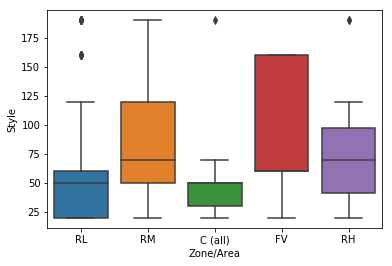

In [8]:
#Query 1: MSZoning and MSSubClass, compare the different styles of houses with the locations
#Prediction: 1-story houses are likely to be in residential low denstiy areas
sub_zone = pd.concat([df_specific['MSZoning'],df_specific['MSSubClass']],axis=1)
fig = sns.boxplot(x='MSZoning',y='MSSubClass',data=sub_zone)
fig.set(xlabel='Zone/Area',ylabel='Style')

#Conclusion, if we look at "RL" we can observe that most of the houses are between no. 25-75 (which are 1-story houses)
#Therefore, our prediction was accurate

Text(0, 0.5, 'Area')

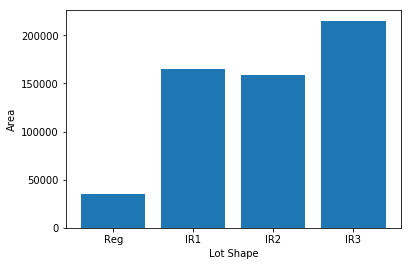

In [10]:
#Query 2: LotShape and LotArea, compare the different types of lot shapes and see how their max areas compare
lot = pd.concat([df_specific['LotShape'],df_specific['LotArea']],axis=1)
fig = plt.bar(df_specific['LotShape'],df_specific['LotArea'])
plt.xlabel('Lot Shape')
plt.ylabel('Area')
#Conclusion: Highly irregular lots have the highest range of lot area, this may be due to the fact that it takes 
#more effort to make the general shape of the property to regular

<BarContainer object of 1460 artists>

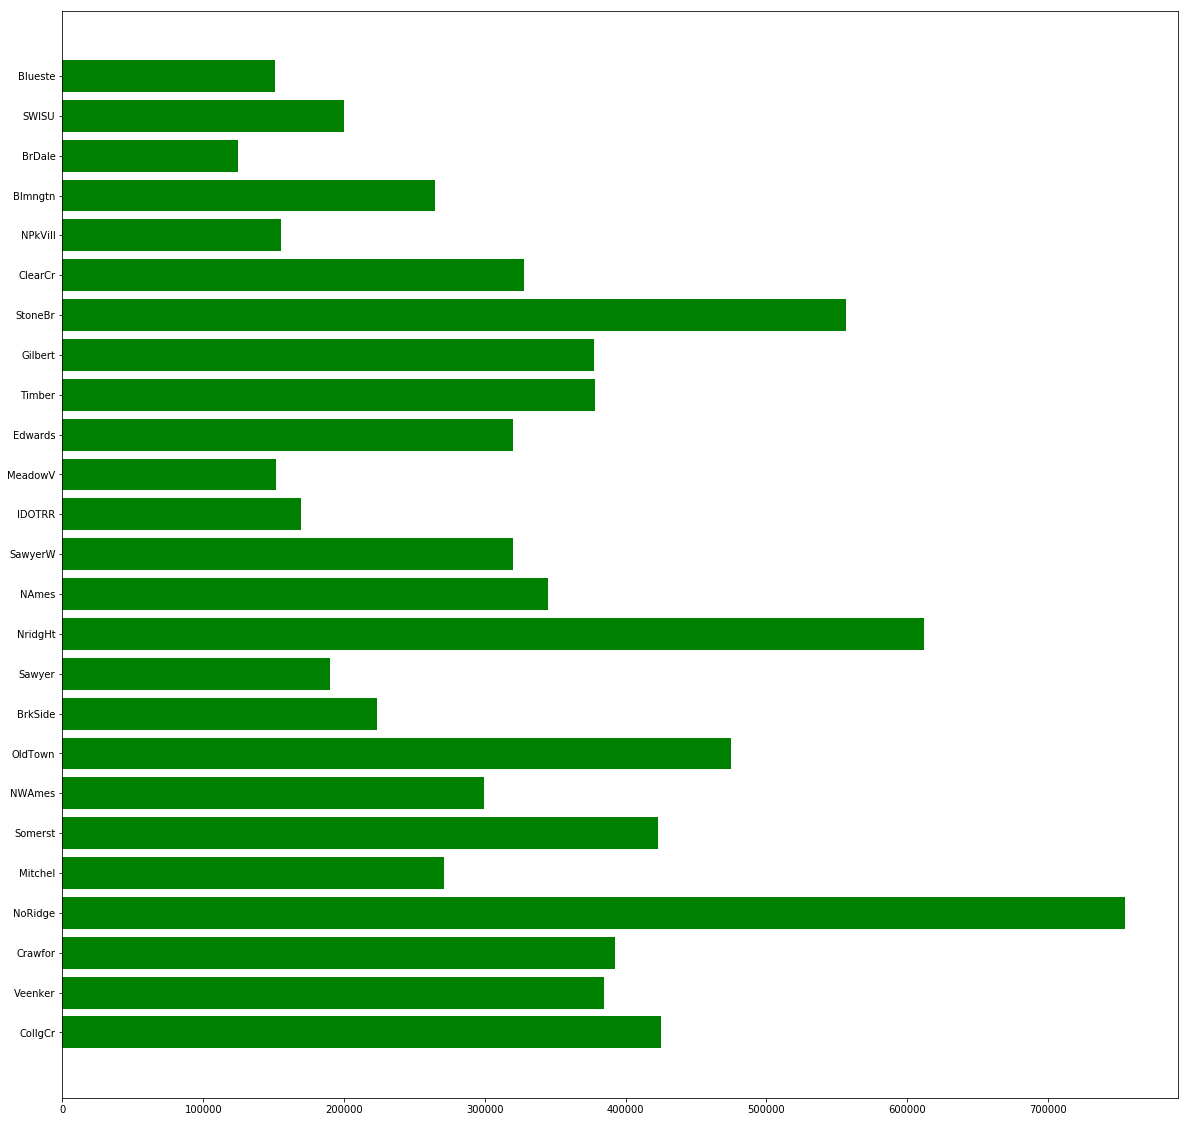

In [11]:
#Query 3: How do neighborhood sale prices compare?
plt.figure(figsize=(20,20))
plt.barh(df_specific['Neighborhood'],df_specific['SalePrice'],color='green')
#Conclusion: the neighborhood with the most expensive house is NoRidge

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


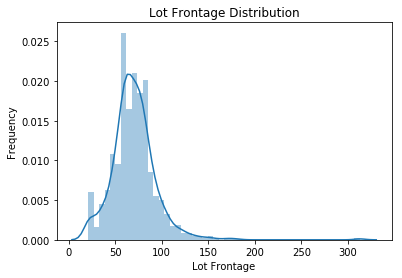

Text(0, 0.5, 'Sale Price')

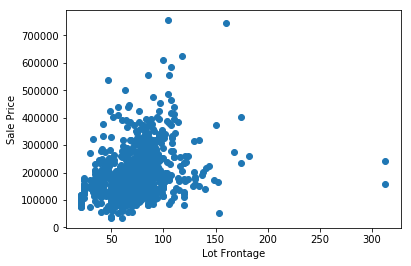

In [12]:
#Query 4: How is lot frontage distributed? This is an example on how to deal with missing values and how is it related to sale price?
lot_frontage = df_specific.LotFrontage[df_specific['LotFrontage'].notna()]
sns.distplot(lot_frontage)
plt.xlabel('Lot Frontage')
plt.ylabel('Frequency')
plt.title('Lot Frontage Distribution')
plt.show()
plt.scatter(df_specific['LotFrontage'],df_specific['SalePrice'])
plt.xlabel('Lot Frontage')
plt.ylabel('Sale Price')
#Conclusion: It appears that lot frontage follows a normal distribution approximately and it does affect the sale price in a linear way


Text(0, 0.5, 'Sale Price')

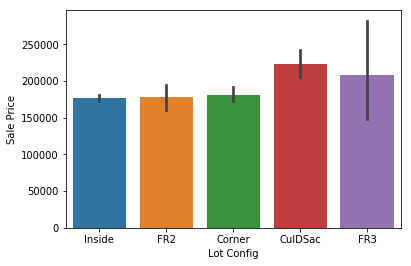

In [13]:
#Query 5: How does the lot configuration affect the sale price?
lotconfig_sale = df_specific[['LotConfig','SalePrice']]
sns.barplot(df_specific['LotConfig'],df_specific['SalePrice'],data=lotconfig_sale)
plt.xlabel('Lot Config')
plt.ylabel('Sale Price')
#Conclusion: The cul-de-sac has the highest sale price on average, The margin of error in the data for FR3 is much higher
#than the rest

Text(0.5, 1.0, 'Style of house with sale price and street')

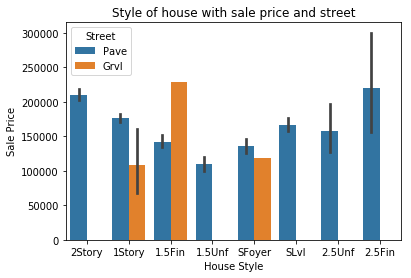

In [30]:
#Query 6: How does the style of house affect the sale price? To get even more information we can add a hue
#(further splitting the data) into another categorical variables - the street to which the house connects to
housestyle_sale = pd.concat([df_specific['HouseStyle'],df_specific['SalePrice'],df_specific['Street']],axis=1)
sns.barplot(df_specific['HouseStyle'],df_specific['SalePrice'],data=housestyle_sale,hue='Street')
plt.xlabel('House Style')
plt.ylabel('Sale Price')
plt.title('Style of house with sale price and street')
#Conclusion: There are more paved streets connecting to each house, The highest sale price appears to be the
#one and half story house, which is connected with a gravel road, the largest margin of error is in the 2.5Fin